# ANN Model creation and testing

## Contents

1. Training data generation
2. ANN model training and testing
3. Implementation of the model in GWSNR

In [1]:
# # If you have not installed the following packages, please uncomment and run the following command:
# !pip install ler

## 1. Training data generation

* The training data is generated using [ler](https://ler.readthedocs.io/en/latest/) package.
* Data needs to be trained for each detector separately.
* I will choose 'L1' detector for this notebook with the following specified parameters:
    * Sampling frequency : 2048 Hz
    * waveform approximant : IMRPhenomXPHM
    * minimum frequency : 20.0
    * psd : aLIGO_O4_high_asd.txt from `pycbc` package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ler.utils import TrainingDataGenerator

In [2]:
tdg = TrainingDataGenerator(
    npool=8,  # number of processes
    verbose=False, # set it to True if you are running the code for the first time
    # GWSNR parameters
    sampling_frequency=2048.,
    waveform_approximant='IMRPhenomXPHM',  # spin-precessing waveform model
    minimum_frequency=20.,
    psds={'V1':'AdV_asd.txt'}, # chosen interferometer is 'L1'. If multiple interferometers are chosen, optimal network SNR will be considered.
    spin_zero=False,
    spin_precessing=True,
    snr_type='inner_product',  # 'interpolation' or 'inner_product'
)

* `ler` package, by default, generates astrophysical signals that most likely will not be detected by the detector, i.e. low SNR signals.

* But you want your ANN model to be sensitive to the signals that near the detection threshold.

* So, I will generate most of the training data with SNR near the detection threshold.

**Note:** Increase sample size of the training data to get better accuracy in the ANN model.

In [3]:
# might take 13mins~15mins
# 48 mins 43.4 s, 20000 samples with 8 processes and batch_size=400000
ler = tdg.gw_parameters_generator(
    size=10000,  # number of samples to generate
    batch_size=400000,  # reduce this number if you have memory issues
    snr_recalculation=True,  # pick SNR generated with 'interpolation'; recalculate SNR using 'inner product'
    trim_to_size=False, verbose=True,
    data_distribution_range = [0., 2., 4., 6., 8., 10., 12., 14., 16., 100.],  # equal data samples will be distributed in these ranges
    replace=False,  # set to True if you want to replace the existing data
    output_jsonfile="IMRPhenomXPHM_O4_high_asd_V1_1.json",
)


Initializing GWRATES class...

current size of the json file: 8397

total event to collect: 10000



100%|████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 260.70it/s]


Collected number of events: 8487


100%|████████████████████████████████████████████████████████████| 161/161 [00:00<00:00, 268.47it/s]


Collected number of events: 8613


100%|████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 278.00it/s]


Collected number of events: 8721


100%|████████████████████████████████████████████████████████████| 213/213 [00:00<00:00, 304.72it/s]


Collected number of events: 8865


100%|████████████████████████████████████████████████████████████| 189/189 [00:00<00:00, 292.19it/s]


Collected number of events: 9009


100%|████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 214.69it/s]


Collected number of events: 9054


100%|████████████████████████████████████████████████████████████| 153/153 [00:00<00:00, 274.24it/s]


Collected number of events: 9126


100%|████████████████████████████████████████████████████████████| 231/231 [00:00<00:00, 312.34it/s]


Collected number of events: 9297


100%|████████████████████████████████████████████████████████████| 152/152 [00:00<00:00, 255.09it/s]


Collected number of events: 9405


100%|████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 223.55it/s]


Collected number of events: 9477


100%|████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 201.90it/s]


Collected number of events: 9531


100%|████████████████████████████████████████████████████████████| 126/126 [00:00<00:00, 229.30it/s]


Collected number of events: 9639


100%|████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 289.85it/s]


Collected number of events: 9783


100%|████████████████████████████████████████████████████████████| 225/225 [00:00<00:00, 313.44it/s]


Collected number of events: 9927


100%|████████████████████████████████████████████████████████████| 162/162 [00:00<00:00, 258.57it/s]


Collected number of events: 10062
final size: 10062

json file saved at: ./ler_data/IMRPhenomXPHM_O4_high_asd_V1_1.json



In [3]:
# might take 2mins~3mins
# 10 mins 0.7 s, 10000 samples with 8 processes and batch_size=200000  
tdg.gw_parameters_generator(
    size=5000, 
    batch_size=200000, 
    snr_recalculation=True,
    trim_to_size=False, verbose=True, 
    data_distribution_range = [4., 8., 12.], # equal data samples will be distributed in these ranges
    replace=False,
    output_jsonfile="IMRPhenomXPHM_O4_high_asd_V1_2.json",
)


Initializing GWRATES class...

current size of the json file: 5070

total event to collect: 5000

final size: 5070

json file saved at: ./ler_data/IMRPhenomXPHM_O4_high_asd_V1_2.json



In [4]:
tdg.gw_parameters_generator(
    size=10000,
    batch_size=10000, 
    snr_recalculation=True,
    trim_to_size=False, 
    verbose=False, 
    data_distribution_range = None,
    replace=True,
    output_jsonfile="IMRPhenomXPHM_O4_high_asd_V1_3.json",
)


Initializing GWRATES class...

total event to collect: 10000

final size: 10000

json file saved at: ./ler_data/IMRPhenomXPHM_O4_high_asd_V1_3.json



### Additional random samples

In [5]:
from gwsnr import GWSNR
import numpy as np

gwsnr = GWSNR(
    npool=8,  # number of processes
    # GWSNR parameters
    sampling_frequency=2048.,
    waveform_approximant='IMRPhenomXPHM',  # spin-precessing waveform model
    minimum_frequency=20.,
    psds={'V1':'AdV_asd.txt'}, # chosen interferometer is 'L1'. If multiple network SNR will be considered.
    snr_type='inner_product',  # 'interpolation' or 'inner_product'
)


Initializing GWSNR class...

Intel processor has trouble allocating memory when the data is huge. So, by default for IMRPhenomXPHM, duration_max = 64.0. Otherwise, set to some max value like duration_max = 600.0 (10 mins)

Chosen GWSNR initialization parameters:

npool:  8
snr type:  inner_product
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  9.96
max(mtot) (with the given fmin=20.0): 235.0
detectors:  ['V1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/AdV_asd.txt')]




In [6]:
# gerneral case, random parameters
np.random.seed(64)
nsamples = 50000
mtot = np.random.uniform(2*4.98, 2*112.5,nsamples)
mass_ratio = np.random.uniform(0.2,1,size=nsamples)
param_dict = dict(
    # convert to component masses
    mass_1 = mtot / (1 + mass_ratio),
    mass_2 = mtot * mass_ratio / (1 + mass_ratio),
    # Fix luminosity distance
    luminosity_distance = np.random.uniform(40, 10000, size=nsamples),  # Random luminosity distance between 40 and 10000 Mpc
    # Randomly sample everything else:
    theta_jn = np.random.uniform(0,2*np.pi, size=nsamples),
    ra = np.random.uniform(0,2*np.pi, size=nsamples), 
    dec = np.random.uniform(-np.pi/2,np.pi/2, size=nsamples), 
    psi = np.random.uniform(0,2*np.pi, size=nsamples),
    phase = np.random.uniform(0,2*np.pi, size=nsamples),
    geocent_time = 1246527224.169434*np.ones(nsamples),
    # spin zero
    a_1 = np.random.uniform(0.0,0.8, size=nsamples),
    a_2 = np.random.uniform(0.0,0.8, size=nsamples),
    tilt_1 = np.random.uniform(0, np.pi, size=nsamples),  # tilt angle of the primary black hole in radians
    tilt_2 = np.random.uniform(0, np.pi, size=nsamples),
    phi_12 = np.random.uniform(0, 2*np.pi, size=nsamples),  # Relative angle between the primary and secondary spin of the binary in radians
    phi_jl = np.random.uniform(0, 2*np.pi, size=nsamples),  # Angle between the total angular momentum and the orbital angular momentum in radians
)

snrs_ = gwsnr.snr(gw_param_dict=param_dict)
# time: 0.2 s for 50000 samples with 8 processes

solving SNR with inner product


100%|███████████████████████████████████████████████████████| 50000/50000 [00:38<00:00, 1313.88it/s]


In [7]:
param_dict.update(snrs_)
from gwsnr.utils import append_json
append_json(
    file_name="ler_data/IMRPhenomXPHM_O4_high_asd_V1_4.json", 
    new_dictionary =param_dict,
    replace=True,  # set to True if you want to replace the existing data
);

### Combine all the data files into one

## V1 detector

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ler.utils import TrainingDataGenerator

tdg = TrainingDataGenerator()
tdg.combine_dicts(
    file_name_list=["IMRPhenomXPHM_O4_high_asd_V1_1.json", "IMRPhenomXPHM_O4_high_asd_V1_2.json", "IMRPhenomXPHM_O4_high_asd_V1_3.json", "IMRPhenomXPHM_O4_high_asd_V1_4.json"],
    detector='V1',
    output_jsonfile="IMRPhenomXPHM_O4_high_asd_V1.json",
)

json file saved at: ./ler_data/IMRPhenomXPHM_O4_high_asd_V1.json



In [13]:
# from gwsnr.utils import get_param_from_json
# test1 = get_param_from_json("./ler_data/IMRPhenomXPHM_O4_high_asd_V1.json")

# snr = np.array(test1['V1'])
# print(f"Number of samples: {len(snr)}")

# plt.figure(figsize=[4,4])
# plt.hist(snr, bins=100, density=True, alpha=0.5, color='b', histtype='step', label='L1')
# plt.xlim([0, 40])
# plt.xlabel('Optimal SNR')
# plt.ylabel('Density')
# plt.legend()
# plt.show()

### ANN model training and testing

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from gwsnr.ann import ANNModelGenerator

In [8]:
amg = ANNModelGenerator(
    directory='./ann_data',
    npool=8,
    gwsnr_verbose=False,
    snr_th=8.0,
    waveform_approximant="IMRPhenomXPHM",
    psds={'V1': 'AdV_asd.txt'},  
)


Initializing GWSNR class...

Intel processor has trouble allocating memory when the data is huge. So, by default for IMRPhenomXPHM, duration_max = 64.0. Otherwise, set to some max value like duration_max = 600.0 (10 mins)
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/partialSNR_dict_1.pickle




In [9]:
amg.ann_model_training(
    gw_param_dict='ler_data/IMRPhenomXPHM_O4_high_asd_V1.json', # you can also get the dict from a json file first
    randomize=True,
    test_size=0.1,
    random_state=42,
    num_nodes_list = [5, 32, 32, 1],
    activation_fn_list = ['relu', 'relu', 'sigmoid', 'linear'],
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy'],
    batch_size=32,
    epochs=100,
    error_adjustment_snr_range=[2,14],
    ann_file_name = 'ann_model_V1.h5',
    scaler_file_name = 'scaler_V1.pkl',
    error_adjustment_file_name='error_adjustment_V1.json',
    ann_path_dict_file_name='ann_path_dict.json',
)

# # Uncomment the following, if you have already trained the model
# # load the trained model
# amg.load_model_scaler_error(
#     ann_file_name='ann_model_V1.h5', 
#     scaler_file_name='scaler_V1.pkl',
#     error_adjustment_file_name='error_adjustment_V1.json',
# )

Epoch 1/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step - accuracy: 4.9722e-04 - loss: 634.2419
Epoch 2/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 1s 312us/step - accuracy: 6.1082e-04 - loss: 531.6430
Epoch 3/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 7.5976e-04 - loss: 512.5308
Epoch 4/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 1s 327us/step - accuracy: 5.8624e-04 - loss: 420.2160
Epoch 5/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 1s 325us/step - accuracy: 9.7015e-04 - loss: 382.3360
Epoch 6/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 1s 315us/step - accuracy: 0.0012 - loss: 446.1954
Epoch 7/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step - accuracy: 0.0011 - loss: 365.3071
Epoch 8/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 1s 312us/step - accuracy: 9.2758e-04 - loss: 364.1766
Epoch 9/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 1s 325us/step - accuracy: 0.0011 - loss: 313.1184
Epoch 10/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 1s 316us/step - accuracy: 0.0012 - loss: 240.2306
Epoch 11/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 1

In [10]:
amg.pdet_error()

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
Error: 2.21%


(2.2092094756454617,
 array([ 5.2581983,  4.103989 , 18.503712 , ..., 13.549152 ,
         2.9394546,  7.342362 ], dtype=float32),
 array([ 5.61821048,  3.7988082 , 18.9255821 , ..., 12.95032423,
         2.30812529,  7.72703788]))

In [11]:
amg.pdet_confusion_matrix()

  1/235 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
[[5539   96]
 [  62 1817]]
Accuracy: 97.897%


(array([[5539,   96],
        [  62, 1817]]),
 97.89725845089167,
 array([False, False,  True, ...,  True, False, False]),
 array([False, False,  True, ...,  True, False, False]))

2348/2348 ━━━━━━━━━━━━━━━━━━━━ 1s 226us/step


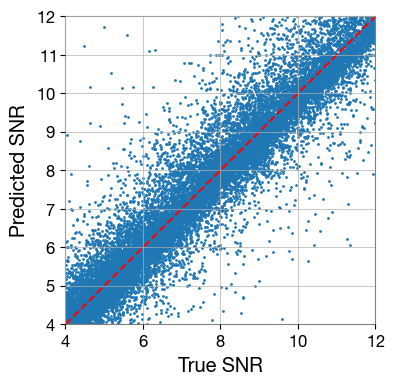

In [12]:
# predicted snr
pred_snr= amg.predict_snr(gw_param_dict='ler_data/IMRPhenomXPHM_O4_high_asd_V1.json')
# true snr
true_snr = amg.get_parameters(gw_param_dict='ler_data/IMRPhenomXPHM_O4_high_asd_V1.json')['V1']
# select only snr between 4 and 12
snr_min = 4
snr_max = 12
mask = (true_snr >= snr_min) & (true_snr <= snr_max)
true_snr = true_snr[mask]
pred_snr = pred_snr[mask]

# plot the predicted snr vs true snr
plt.figure(figsize=[4,4])
plt.scatter(true_snr, pred_snr, s=1)
snr_lim = [np.min([true_snr, true_snr]), np.max([true_snr, true_snr])]
plt.plot(snr_lim, snr_lim, 'r--')
plt.xlabel('True SNR')
plt.ylabel('Predicted SNR')
plt.xlim([snr_min, snr_max])
plt.ylim([snr_min, snr_max])
plt.show()

In [ ]:
# use the following function to predict the pdet
pred_pdet = amg.predict_pdet(gw_param_dict='ler_data/IMRPhenomXPHM_O4_high_asd_V1.json', snr_threshold=8.0)

true_snr = amg.get_parameters(gw_param_dict='ler_data/IMRPhenomXPHM_O4_high_asd_V1.json')['V1']
# true pdet
true_pdet = np.array([1 if snr >= 8.0 else 0 for snr in true_snr])

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(true_pdet, pred_pdet)
print(cm)

acc = accuracy_score(true_pdet, pred_pdet)
print(acc)


2348/2348 ━━━━━━━━━━━━━━━━━━━━ 1s 218us/step
[[55566   783]
 [  717 18066]]
0.980035138156844


## 3. Implementation of the ANN model in GWSNR

Generate new astrophysical data and test the model on it using GWSNR class.

In [1]:
from ler.utils import TrainingDataGenerator

# generate some new data
tdg = TrainingDataGenerator(
    npool=4,
    verbose=False, 
    # GWSNR parameters
    sampling_frequency=2048,
    waveform_approximant='IMRPhenomXPHM',
    psds={'V1': 'AdV_asd.txt'},  
    minimum_frequency=20,
    spin_zero=False,
    spin_precessing=True,
    snr_type='inner_product',
)

tdg.gw_parameters_generator(
    size=20000, 
    batch_size=20000, 
    snr_recalculation=False,
    trim_to_size=False, 
    verbose=True, 
    data_distribution_range = None, 
    replace=False,
    output_jsonfile="IMRPhenomXPHM_O4_high_asd_V1_5.json",
)


Initializing GWRATES class...

current size of the json file: 20000

total event to collect: 20000

final size: 20000

json file saved at: ./ler_data/IMRPhenomXPHM_O4_high_asd_V1_5.json



* using GWSNR class, with the trained ANN model, you can generate SNR of the astrophysical GW signal parameters

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from gwsnr import GWSNR

gwsnr = GWSNR(
    snr_type='ann',
    npool=8,  # number of processes
    waveform_approximant="IMRPhenomXPHM",
    psds={'V1': 'AdV_asd.txt'},
    ann_path_dict='./ann_data/ann_path_dict.json',
)


Initializing GWSNR class...

Intel processor has trouble allocating memory when the data is huge. So, by default for IMRPhenomXPHM, duration_max = 64.0. Otherwise, set to some max value like duration_max = 600.0 (10 mins)
ANN model and scaler path is given. Using the given path.
ANN model for V1 is loaded from ./ann_data/ann_model_V1.h5.
ANN scaler for V1 is loaded from ./ann_data/scaler_V1.pkl.
ANN error_adjustment for V1 is loaded from ./ann_data/error_adjustment_V1.json.
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/partialSNR_dict_1.pickle

Chosen GWSNR initialization parameters:

npool:  8
snr type:  ann
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  9.96
max(mtot) (with the given fmin=20.0): 235.0
detectors:  ['V1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_

In [3]:
# predicted snr, using ANN model 
pred_snr = gwsnr.snr_with_ann(gw_param_dict='./ler_data/IMRPhenomXPHM_O4_high_asd_V1_5.json')['V1']#['optimal_snr_net']

In [4]:
from gwsnr.utils import get_param_from_json
true_snr = get_param_from_json('./ler_data/IMRPhenomXPHM_O4_high_asd_V1_5.json')['V1']#['optimal_snr_net']

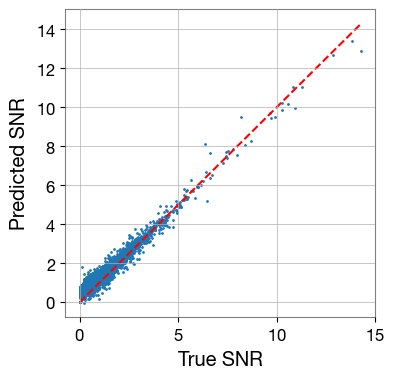

In [5]:
# select only snr between 4 and 12
# snr_min = 4
# snr_max = 12
# mask = (true_snr >= snr_min) & (true_snr <= snr_max)
# true_snr = true_snr[mask]
# pred_snr = pred_snr[mask]

# plot the predicted snr vs true snr
plt.figure(figsize=[4,4])
plt.scatter(true_snr, pred_snr, s=1)
snr_lim = [np.min([true_snr, true_snr]), np.max([true_snr, true_snr])]
plt.plot(snr_lim, snr_lim, 'r--')
plt.xlabel('True SNR')
plt.ylabel('Predicted SNR')
# plt.xlim([snr_min, snr_max])
# plt.ylim([snr_min, snr_max])
plt.show()

In [6]:
# use the following function to predict the pdet
pred_pdet = np.array([1 if snr >= 8.0 else 0 for snr in pred_snr])
# true pdet
true_pdet = np.array([1 if snr >= 8.0 else 0 for snr in true_snr])

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(true_pdet, pred_pdet)
print(cm)

acc = accuracy_score(true_pdet, pred_pdet)
print(acc)

[[19984     1]
 [    0    15]]
0.99995
